In [1]:
from data.pemrosesan_data import ambilData, Split
from algoritma.knn import euclidean_distance
from algoritma.metrik_evaluasi import metrik, visualisasiCM
import pandas as pd
from collections import Counter

In [2]:
# Load dataset
dataset = ambilData() 
# menampilkan dataset
print ("\t\tHasil Import Dataset") 
print (dataset)
X_train, X_test, y_train, y_test = Split(dataset)
print("X Train")
print(X_train)
print("X test")
print(X_test)
print("Y Train")
print(y_train)
print("Y test")
print(y_test)

		Hasil Import Dataset
     Aljabar_Linier  Bahasa_Indonesia  Matematika  Pemrograman_Terstruktur  \
0               2.0               4.0         2.0                      3.0   
1               2.5               4.0         2.0                      3.5   
2               2.0               4.0         3.5                      3.0   
3               3.5               4.0         3.0                      3.0   
4               4.0               4.0         3.0                      3.5   
..              ...               ...         ...                      ...   
111             3.5               4.0         4.0                      3.5   
112             3.5               4.0         2.0                      2.0   
113             4.0               4.0         3.0                      3.5   
114             4.0               3.5         2.0                      3.5   
115             4.0               4.0         3.5                      3.5   

     Pendidikan_Karakter  Sistem_Digital

In [3]:
peminat = dataset['Bidang_Minat'].value_counts()
print(peminat)

Bidang_Minat
ai        47
rpl       40
jarkom    29
Name: count, dtype: int64


In [4]:
K = int(input('Masukkan K : '))

Masukkan K :  4


In [5]:
matriks_jarak = []
for i in range(len(X_test)):
    jarak = []
    for ii in range(len(X_train)):
        hitung_jarak = euclidean_distance(X_test.iloc[i],X_train.iloc[ii], X_train)
        jarak.append(hitung_jarak)
    matriks_jarak.append(jarak)

In [6]:
# Menampilkan hasil jarak
df_jarak = pd.DataFrame(matriks_jarak, index=X_test.index, columns=X_train.index)
print("Jarak Euclidean antara semua pasangan baris dalam dataset:")
print(df_jarak)

Jarak Euclidean antara semua pasangan baris dalam dataset:
          0         1         2         3         4         5         6    \
104  3.807887  5.634714  6.422616  5.766281  6.442049  5.937171  6.910137   
105  6.614378  6.708204  6.964194  6.363961  6.652067  5.612486  7.035624   
106  6.689544  7.280110  7.810250  7.211103  7.088723  7.314369  7.582875   
107  4.000000  2.783882  4.330127  3.640055  3.605551  4.330127  2.872281   
108  5.315073  5.196152  5.567764  4.847680  5.024938  3.937004  5.196152   
109  5.656854  5.809475  6.383573  5.267827  6.041523  4.873397  5.545268   
110  4.847680  3.041381  3.708099  4.555217  2.449490  4.716991  2.872281   
111  5.338539  5.500000  6.020797  4.924429  5.522681  4.500000  5.172040   
112  4.769696  5.700877  6.595453  5.744563  6.383573  5.567764  6.519202   
113  5.123475  3.240370  3.807887  4.527693  2.783882  4.847680  2.449490   
114  4.123106  2.958040  3.905125  3.640055  3.316625  3.708099  4.031129   
115  4.527693  3.

In [7]:
# Menemukan k jarak terdekat untuk setiap baris dalam data pengujian
indeks_terdekat = df_jarak.apply(lambda row: row.nsmallest(K).index, axis=1)
jarak_terdekat = df_jarak.apply(lambda row: row.nsmallest(K).values, axis=1)
# Menampilkan hasil jarak terdekat
hasil_jarak = []
for i, index_test in enumerate(X_test.index):
    k_indeks_terdekat = indeks_terdekat[index_test]
    k_jarak_tedekat = jarak_terdekat[index_test]
    for ii in range(K):
        index_train = k_indeks_terdekat[ii]
        jarak = k_jarak_tedekat[ii]
        kelas_train = y_train[index_train]
        hasil_jarak.append({
            'Index Test': index_test,
            'Index Train': index_train,
            'Jarak': jarak,
            'Kelas Train': kelas_train
        })
hasil_jarak_df = pd.DataFrame(hasil_jarak)
print("Jarak Terdekat dari Setiap Baris Data Pengujian ke Data Pelatihan:")
print(hasil_jarak_df)


Jarak Terdekat dari Setiap Baris Data Pengujian ke Data Pelatihan:
    Index Test  Index Train     Jarak Kelas Train
0          104            0  3.807887         rpl
1          104           15  4.000000         rpl
2          104           37  5.024938          ai
3          104           99  5.099020         rpl
4          105          103  4.444097          ai
5          105           45  4.472136         rpl
6          105           88  4.527693          ai
7          105           84  4.609772         rpl
8          106           15  5.852350         rpl
9          106           37  5.916080          ai
10         106            9  6.224950          ai
11         106           49  6.344289         rpl
12         107           75  2.449490          ai
13         107           63  2.598076          ai
14         107           20  2.692582         rpl
15         107           39  2.738613      jarkom
16         108           84  2.958040         rpl
17         108           88  3.74

In [8]:
# Menentukan kelas baru pada data pengujian berdasarkan kelas mayoritas dari tetangga terdekat
kelas_prediksi = []
for index_test in X_test.index:
    kelas_terdekat = hasil_jarak_df[hasil_jarak_df['Index Test'] == index_test]['Kelas Train']
    kelas_mayoritas = Counter(kelas_terdekat).most_common(1)[0][0]
    kelas_prediksi.append({
        'Index Test': index_test,
        'Kelas Prediksi':kelas_mayoritas
    })

 # Kelas prediksi
kelas_prediksi_df = pd.DataFrame(kelas_prediksi)
kelas_prediksi_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
hasil_prediksi = result = pd.concat([kelas_prediksi_df, y_test], axis=1)
hasil_prediksi.rename(columns={'Bidang_Minat': 'Target'}, inplace=True)
print("Kelas Baru pada Data Pengujian Berdasarkan Kelas Mayoritas dari Tetangga Terdekat:")
print(hasil_prediksi)


Kelas Baru pada Data Pengujian Berdasarkan Kelas Mayoritas dari Tetangga Terdekat:
    Index Test Kelas Prediksi  Target
0          104            rpl      ai
1          105             ai      ai
2          106            rpl      ai
3          107             ai     rpl
4          108         jarkom      ai
5          109             ai     rpl
6          110             ai     rpl
7          111             ai      ai
8          112             ai      ai
9          113             ai      ai
10         114            rpl  jarkom
11         115             ai  jarkom


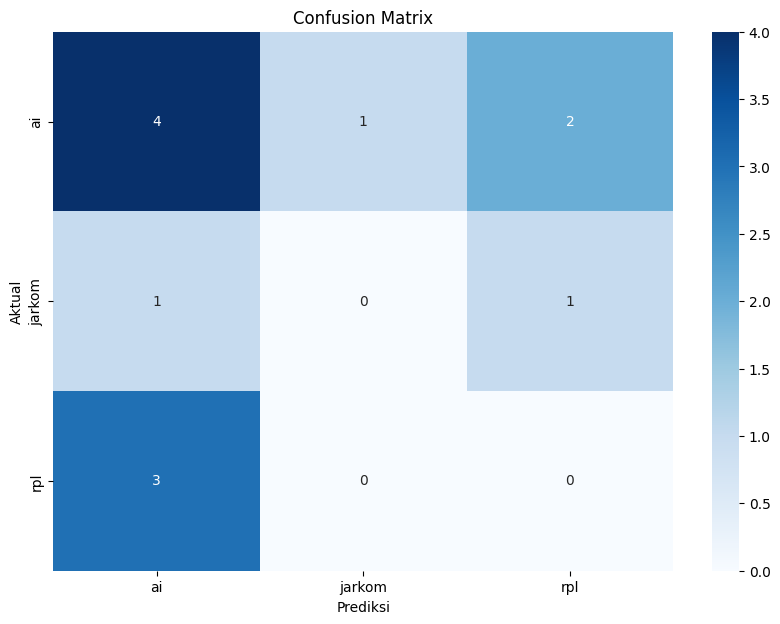

Prediksi Benar :  4
Prediksi salah :  8
Akurasi :  0.3333333333333333
Presisi :  0.19047619047619047
Recall :  0.16666666666666666
F1 Score :  0.17777777777777778


In [9]:
#Evaluasi
cm, T, F, akurasi, presisi, recall, f1 = metrik(hasil_prediksi['Kelas Prediksi'],hasil_prediksi['Target'])
visualisasiCM(cm)
print("Prediksi Benar : ",T)
print("Prediksi salah : ",F)
print("Akurasi : ",akurasi)
print("Presisi : ",presisi)
print("Recall : ",recall)
print("F1 Score : ",f1)

In [10]:
# Prediksi peminat jurusan
bidang_minat = pd.Series(list(set(dataset['Bidang_Minat']).union(set(kelas_prediksi_df['Kelas Prediksi']))))
prediksi_peminat = kelas_prediksi_df['Kelas Prediksi'].value_counts().reindex(bidang_minat, fill_value=0)
print(prediksi_peminat)

ai        8
rpl       3
jarkom    1
Name: count, dtype: int64
